
## Autoencoder on MNIST dataset



In [ ]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
(train_imgs, train_labels), (test_imgs, test_labels) = tf.keras.datasets.mnist.load_data()
train_imgs = train_imgs.astype('float32') / 255.
test_imgs = test_imgs.astype('float32') / 255.
train_imgs = train_imgs.reshape((len(train_imgs), np.prod(train_imgs.shape[1:])))
test_imgs = test_imgs.reshape((len(test_imgs), np.prod(test_imgs.shape[1:])))
labeled_indices = np.random.choice(60000, replace=False, size=1000)
image_subset = train_imgs[labeled_indices]
label_susbet = train_labels[labeled_indices]
print(train_imgs.shape)
print(test_imgs.shape)

(60000, 784)
(10000, 784)


In [ ]:
code_shape = 32
image_input = tf.keras.Input((784, ))
encoding_1 = tf.keras.layers.Dense(64, activation=tf.nn.relu)(image_input)
encoding_2 = tf.keras.layers.Dense(code_shape, activation=tf.nn.relu)(encoding_1)
encoder = tf.keras.Model(image_input, encoding_2)

code_input = tf.keras.Input((code_shape,))
decoding_1 = tf.keras.layers.Dense(64, activation=tf.nn.relu)(code_input)
decoding_2 = tf.keras.layers.Dense(784, activation=tf.nn.sigmoid)(decoding_1)
decoder = tf.keras.Model(code_input, decoding_2)

autoencoder = tf.keras.Model(image_input, decoder(encoder(image_input)))

autoencoder.compile(optimizer=tf.optimizers.Adam(), loss=tf.losses.BinaryCrossentropy())

autoencoder.fit(train_imgs, train_imgs, epochs=30, batch_size=256)



Epoch 1/30
235/235 [==============================] - 4s 5ms/step - loss: 0.2521
Epoch 2/30
235/235 [==============================] - 1s 5ms/step - loss: 0.1547
Epoch 3/30
235/235 [==============================] - 1s 5ms/step - loss: 0.1310
Epoch 4/30
235/235 [==============================] - 1s 5ms/step - loss: 0.1210
Epoch 5/30
235/235 [==============================] - 1s 5ms/step - loss: 0.1151
Epoch 6/30
235/235 [==============================] - 1s 5ms/step - loss: 0.1110
Epoch 7/30
235/235 [==============================] - 1s 5ms/step - loss: 0.1078
Epoch 8/30
235/235 [==============================] - 1s 5ms/step - loss: 0.1055
Epoch 9/30
235/235 [==============================] - 1s 5ms/step - loss: 0.1036
Epoch 10/30
235/235 [==============================] - 1s 5ms/step - loss: 0.1022
Epoch 11/30
235/235 [==============================] - 1s 5ms/step - loss: 0.1009
Epoch 12/30
235/235 [==============================] - 1s 5ms/step - loss: 0.0998
Epoch 13/30
235/235 [====

In [ ]:
encoded_imgs = encoder.predict(test_imgs)
decoded_imgs = decoder.predict(encoded_imgs)

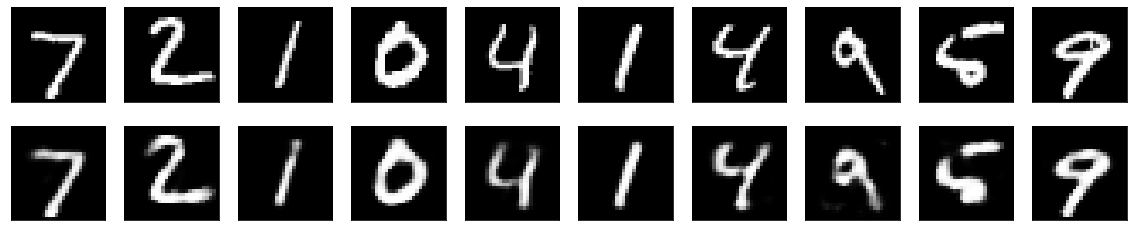

In [ ]:
n = 10 
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(test_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:

small_data = image_subset.astype('float32') / 255.
small_data = small_data.reshape((len(small_data), np.prod(small_data.shape[1:])))
decoded_images=autoencoder.predict(small_data) 
train_labels = tf.keras.utils.to_categorical(label_susbet,10)
test_labels = tf.keras.utils.to_categorical(test_labels,10)

model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(64, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(32, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))
model.compile(optimizer=tf.optimizers.Adam(), 
              loss = tf.keras.losses.CategoricalCrossentropy(),
              metrics = tf.keras.metrics.CategoricalAccuracy())
model.fit(decoded_images, train_labels, batch_size=128,epochs=10,validation_data=(test_imgs,test_labels))

Epoch 1/10
8/8 [==============================] - 1s 81ms/step - loss: 2.3008 - categorical_accuracy: 0.1150 - val_loss: 2.6009 - val_categorical_accuracy: 0.1137
Epoch 2/10
8/8 [==============================] - 0s 51ms/step - loss: 2.2976 - categorical_accuracy: 0.1210 - val_loss: 3.1948 - val_categorical_accuracy: 0.1135
Epoch 3/10
8/8 [==============================] - 0s 40ms/step - loss: 2.2959 - categorical_accuracy: 0.1210 - val_loss: 3.7571 - val_categorical_accuracy: 0.1135
Epoch 4/10
8/8 [==============================] - 0s 39ms/step - loss: 2.2959 - categorical_accuracy: 0.1210 - val_loss: 4.2230 - val_categorical_accuracy: 0.1135
Epoch 5/10
8/8 [==============================] - 0s 43ms/step - loss: 2.2957 - categorical_accuracy: 0.1210 - val_loss: 3.5506 - val_categorical_accuracy: 0.1135
Epoch 6/10
8/8 [==============================] - 0s 51ms/step - loss: 2.2951 - categorical_accuracy: 0.1210 - val_loss: 3.5118 - val_categorical_accuracy: 0.1165
Epoch 7/10
8/8 [======

In [ ]:
(train_imgs, train_labels), (test_imgs, test_labels) = tf.keras.datasets.mnist.load_data()
input = tf.keras.layers.Input(shape=(28, 28, 1))
train_imgs = train_imgs.astype('float32') / 255.
train_imgs = train_imgs.reshape(-1,28,28,1)
labeled_indices = np.random.choice(60000, replace=False, size=1000)
image_subset = train_imgs[labeled_indices]
label_susbet = train_labels[labeled_indices]
test_imgs = test_imgs.astype('float32') / 255.
test_imgs = test_imgs.reshape(-1,28,28,1)

# Encoder
x = tf.keras.layers.Conv2D(32, (3, 3), activation="relu", padding="same")(input)
x = tf.keras.layers.MaxPooling2D((2, 2), padding="same")(x)
x = tf.keras.layers.Conv2D(32, (3, 3), activation="relu", padding="same")(x)
x = tf.keras.layers.MaxPooling2D((2, 2), padding="same")(x)

# Decoder
x = tf.keras.layers.Conv2DTranspose(32, (3, 3), strides=2, activation="relu", padding="same")(x)
x = tf.keras.layers.Conv2DTranspose(32, (3, 3), strides=2, activation="relu", padding="same")(x)
x = tf.keras.layers.Conv2D(1, (3, 3), activation="sigmoid", padding="same")(x)

# Autoencoder
conv_autoencoder =tf.keras.Model(input, x)
conv_autoencoder.compile(optimizer="adam", loss="binary_crossentropy")
conv_autoencoder.summary()

conv_autoencoder.fit(train_imgs, train_imgs, epochs=10, batch_size=256, shuffle = True)

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 conv2d_transpose (Conv2DTra  (None, 14, 14, 32)       9248

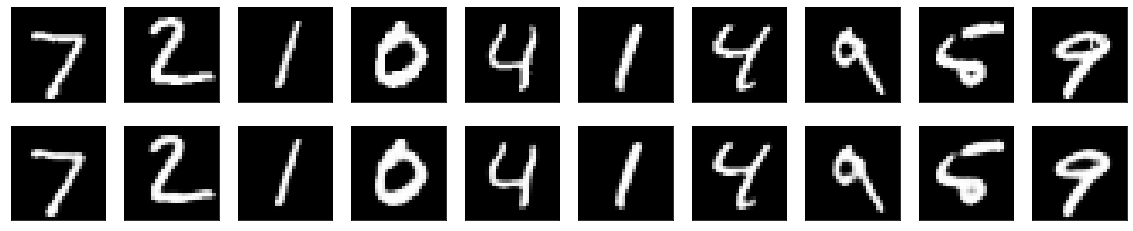

In [ ]:
predictions = conv_autoencoder.predict(test_imgs)


n = 10 
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(test_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(predictions[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:

decoded_images=conv_autoencoder.predict(image_subset)
train_labels = tf.keras.utils.to_categorical(label_susbet,10)
test_labels = tf.keras.utils.to_categorical(test_labels,10)
def training_and_result(train_images, train_labels, test_images, test_labels, channels, rows, columns, epochs):
  model = tf.keras.Sequential()
  model.add(tf.keras.layers.Conv2D(16,kernel_size=(1,1),padding="same",data_format=(None),activation=tf.keras.activations.relu))
  model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=2,padding="valid",data_format=None))
  model.add(tf.keras.layers.Conv2D(32,kernel_size=(3,3),padding="same",data_format=None,activation=tf.keras.activations.relu))
  model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2),padding="valid",data_format=None))
  model.add(tf.keras.layers.Conv2D(64,kernel_size=(3,3),padding="same",data_format=None,activation=tf.keras.activations.relu))
  model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=2,padding="valid",data_format=None))
  model.add(tf.keras.layers.Flatten(data_format=None))
  model.add(tf.keras.layers.Dense(10,activation=tf.keras.activations.softmax))
  model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss = tf.keras.losses.CategoricalCrossentropy(),
              metrics = tf.keras.metrics.CategoricalAccuracy())
  model.build(input_shape=(128,rows,columns,channels))
  model.summary()
  log = model.fit(train_images,train_labels,batch_size=128,epochs=epochs,validation_data=(test_images,test_labels))

training_and_result(decoded_images,train_labels, test_imgs, test_labels, 1, 28, 28, 10)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (128, 28, 28, 16)         32        
                                                                 
 max_pooling2d_2 (MaxPooling  (128, 14, 14, 16)        0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (128, 14, 14, 32)         4640      
                                                                 
 max_pooling2d_3 (MaxPooling  (128, 7, 7, 32)          0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (128, 7, 7, 64)           18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (128, 3, 3, 64)         

In [ ]:
(X_train, Y_train), (X_test, Y_test) = tf.keras.datasets.mnist.load_data()
X_train = X_train.astype('float32') / 255.
output_X_train = X_train.reshape(-1,28,28,1)

X_test = X_test.astype('float32') / 255.
output_X_test = X_test.reshape(-1,28,28,1)
input_x_train = output_X_train + 0.5 * np.random.normal(loc=0.0, scale=1.0, size=output_X_train.shape) 
input_x_test = output_X_test + 0.5 * np.random.normal(loc=0.0, scale=1.0, size=output_X_test.shape)



conv_autoencoder.fit(input_x_train, input_x_train, epochs=10, batch_size=256, shuffle = True)

Epoch 1/10
235/235 [==============================] - 6s 26ms/step - loss: -2709845.2500
Epoch 2/10
235/235 [==============================] - 6s 26ms/step - loss: -79365688.0000
Epoch 3/10
235/235 [==============================] - 6s 26ms/step - loss: -436179424.0000
Epoch 4/10
235/235 [==============================] - 6s 26ms/step - loss: -1305545088.0000
Epoch 5/10
235/235 [==============================] - 6s 26ms/step - loss: -2917671168.0000
Epoch 6/10
235/235 [==============================] - 6s 26ms/step - loss: -5512036864.0000
Epoch 7/10
235/235 [==============================] - 6s 26ms/step - loss: -9337353216.0000
Epoch 8/10
235/235 [==============================] - 6s 26ms/step - loss: -14653808640.0000
Epoch 9/10
235/235 [==============================] - 6s 26ms/step - loss: -21733056512.0000
Epoch 10/10
235/235 [==============================] - 6s 26ms/step - loss: -30860812288.0000


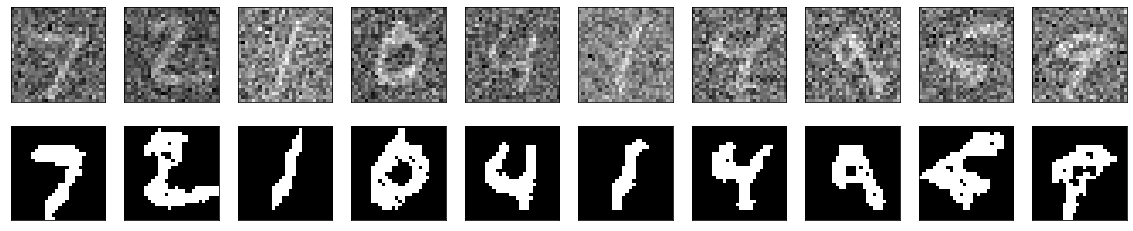

In [ ]:
predictions = conv_autoencoder.predict(test_imgs)

n = 10 
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(input_x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(predictions[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
(train_imgs, train_labels), (test_imgs, test_labels) = tf.keras.datasets.mnist.load_data()
X_train = image_subset.astype('float32') / 255.
output_X_train = X_train.reshape(-1,28,28,1)
X_test = X_test.astype('float32') / 255.
output_X_test = X_test.reshape(-1,28,28,1)
input_x_train = output_X_train + 0.5 * np.random.normal(loc=0.0, scale=1.0, size=output_X_train.shape) 
input_x_test = output_X_test + 0.5 * np.random.normal(loc=0.0, scale=1.0, size=output_X_test.shape)
decoded_images=conv_autoencoder.predict(input_x_train)
train_labels_noise = tf.keras.utils.to_categorical(label_susbet,10)
test_labels = tf.keras.utils.to_categorical(test_labels,10)
def training_and_result(train_images, train_labels, test_images, test_labels, channels, rows, columns, epochs):
  model = tf.keras.Sequential()
  model.add(tf.keras.layers.Conv2D(16,kernel_size=(1,1),padding="same",data_format=(None),activation=tf.keras.activations.relu))
  model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=2,padding="valid",data_format=None))
  model.add(tf.keras.layers.Conv2D(32,kernel_size=(3,3),padding="same",data_format=None,activation=tf.keras.activations.relu))
  model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2),padding="valid",data_format=None))
  model.add(tf.keras.layers.Conv2D(64,kernel_size=(3,3),padding="same",data_format=None,activation=tf.keras.activations.relu))
  model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=2,padding="valid",data_format=None))
  model.add(tf.keras.layers.Flatten(data_format=None))
  model.add(tf.keras.layers.Dense(10,activation=tf.keras.activations.softmax))
  model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss = tf.keras.losses.CategoricalCrossentropy(),
              metrics = tf.keras.metrics.CategoricalAccuracy())
  model.build(input_shape=(128,rows,columns,channels))
  model.summary()
  log = model.fit(train_images,train_labels,batch_size=128,epochs=epochs,validation_data=(test_images,test_labels))

training_and_result(decoded_images,train_labels_noise, input_x_test, test_labels, 1, 28, 28, 10)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (128, 28, 28, 16)         32        
                                                                 
 max_pooling2d_5 (MaxPooling  (128, 14, 14, 16)        0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (128, 14, 14, 32)         4640      
                                                                 
 max_pooling2d_6 (MaxPooling  (128, 7, 7, 32)          0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (128, 7, 7, 64)           18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (128, 3, 3, 64)         

In [ ]:
(train_images, train_labels), (test_images,test_labels) = tf.keras.datasets.mnist.load_data()
#adding a dimension for channel
train_images_mnist = train_images.reshape(train_images.shape[0],28,28,1)
test_images_mnist = test_images.reshape(test_images.shape[0],28,28,1)

train_images_mnist = train_images_mnist.astype(np.float32)/255
test_images_mnist = test_images_mnist.astype(np.float32)/255
#one-hot encoding of lables
train_labels_mnist = tf.keras.utils.to_categorical(train_labels,10)
test_labels_mnist = tf.keras.utils.to_categorical(test_labels,10)


def training_and_result(train_images, train_labels, test_images, test_labels, channels, rows, columns, epochs):
  model = tf.keras.Sequential()
  model.add(tf.keras.layers.Conv2D(16,kernel_size=(1,1),padding="same",data_format=(None),activation=tf.keras.activations.relu))
  model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=2,padding="valid",data_format=None))
  model.add(tf.keras.layers.Conv2D(32,kernel_size=(3,3),padding="same",data_format=None,activation=tf.keras.activations.relu))
  model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2),padding="valid",data_format=None))
  model.add(tf.keras.layers.Conv2D(64,kernel_size=(3,3),padding="same",data_format=None,activation=tf.keras.activations.relu))
  model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=2,padding="valid",data_format=None))
  model.add(tf.keras.layers.Flatten(data_format=None))
  model.add(tf.keras.layers.Dense(10,activation=tf.keras.activations.softmax))
  model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss = tf.keras.losses.CategoricalCrossentropy(),
              metrics = tf.keras.metrics.CategoricalAccuracy())
  model.build(input_shape=(128,rows,columns,channels))
  model.summary()
  log = model.fit(train_images,train_labels,batch_size=128,epochs=epochs,validation_data=(test_images,test_labels))

training_and_result(train_images_mnist,train_labels_mnist, test_images_mnist, test_labels_mnist, 1, 28, 28, 10)


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (128, 28, 28, 16)         32        
                                                                 
 max_pooling2d_8 (MaxPooling  (128, 14, 14, 16)        0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (128, 14, 14, 32)         4640      
                                                                 
 max_pooling2d_9 (MaxPooling  (128, 7, 7, 32)          0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (128, 7, 7, 64)           18496     
                                                                 
 max_pooling2d_10 (MaxPoolin  (128, 3, 3, 64)         